**Business Use Case Oolala, a cab aggregator service, has a problem statement which they want you to validate and provide an explanation backed by numbers. It is observed and reported that customers are not able to find cabs to go to the Airport as drivers are canceling airport trips. They want you to investigate if this is indeed true.**

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline 

In [ ]:
#reading data provided
cabs_data= pd.read_excel("olala cabs case study (1).xlsx")

## **1. Understanding the dataset**

In [ ]:
cabs_data.head()

,order_id,status,customer_id,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by
0,4824156,4,305169,10.0,2019-01-02 13:10:13,2019-01-02 13:32:19,2019-01-02 14:04:25,Andheri West,Juhu,1.70,NaN
1,4826642,4,498734,10.0,2019-01-02 16:45:56,2019-01-02 17:01:15,2019-01-02 21:08:13,Andheri East,Kalyan,47.03,NaN
2,4830467,4,125080,10.0,2019-01-03 11:25:48,2019-01-03 11:30:54,2019-01-03 13:02:43,Andheri West,Bandra West,7.93,NaN
3,4832599,4,107008,10.0,2019-01-03 14:50:58,2019-01-03 14:37:06,2019-01-03 15:09:52,Juhu,Jogeshwari West,6.35,NaN
4,4833444,4,278997,10.0,2019-01-03 15:36:29,2019-01-03 15:42:35,2019-01-03 17:29:24,Jogeshwari West,Saki Naka,8.48,NaN


In [ ]:
cabs_data.shape

(20205, 11)

In [ ]:
#looking at columns
cabs_data.columns

Index(['order_id', 'status', 'customer_id', 'driver_id', 'pickup_time',
       'start_time', 'drop_time', 'pickup_loc', 'drop_loc', 'travel_distance',
       'cancelled_by'],
      dtype='object')

In [ ]:
#unique values
cabs_data.nunique()

order_id           20168
status                 2
customer_id         9069
driver_id           1443
pickup_time        19781
start_time         15327
drop_time          15359
pickup_loc            73
drop_loc              73
travel_distance     4421
cancelled_by           3
dtype: int64

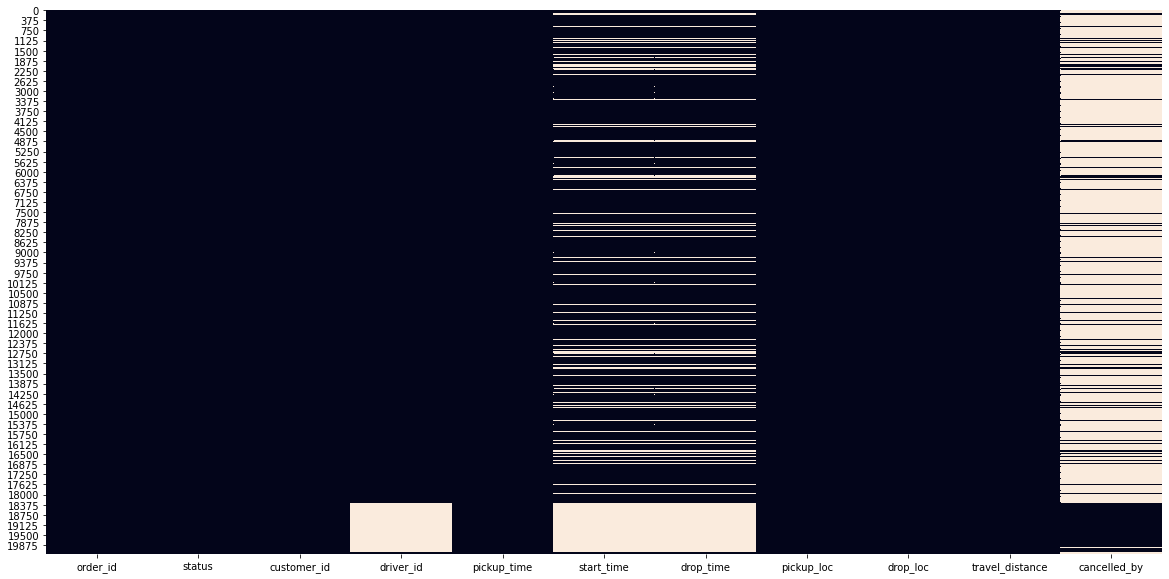

In [ ]:
#Null values in each columns
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(cabs_data.isnull(), cbar = False)
plt.show()

In [ ]:
#as we can see most of the nulls lies in cancelled_by column which indicates trip completion 
#and for other columns start_time and drop_time are least significant 

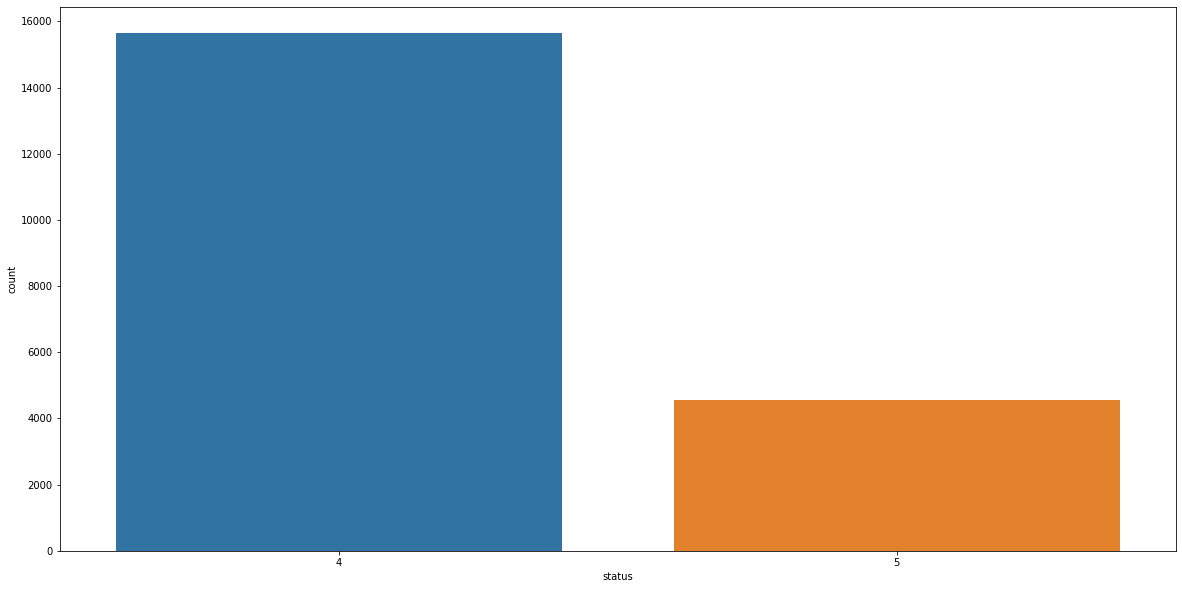

In [ ]:
#comparing ratio betweem trips completion and cancellation
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='status', data = cabs_data) 
# Show the plot 
plt.show()

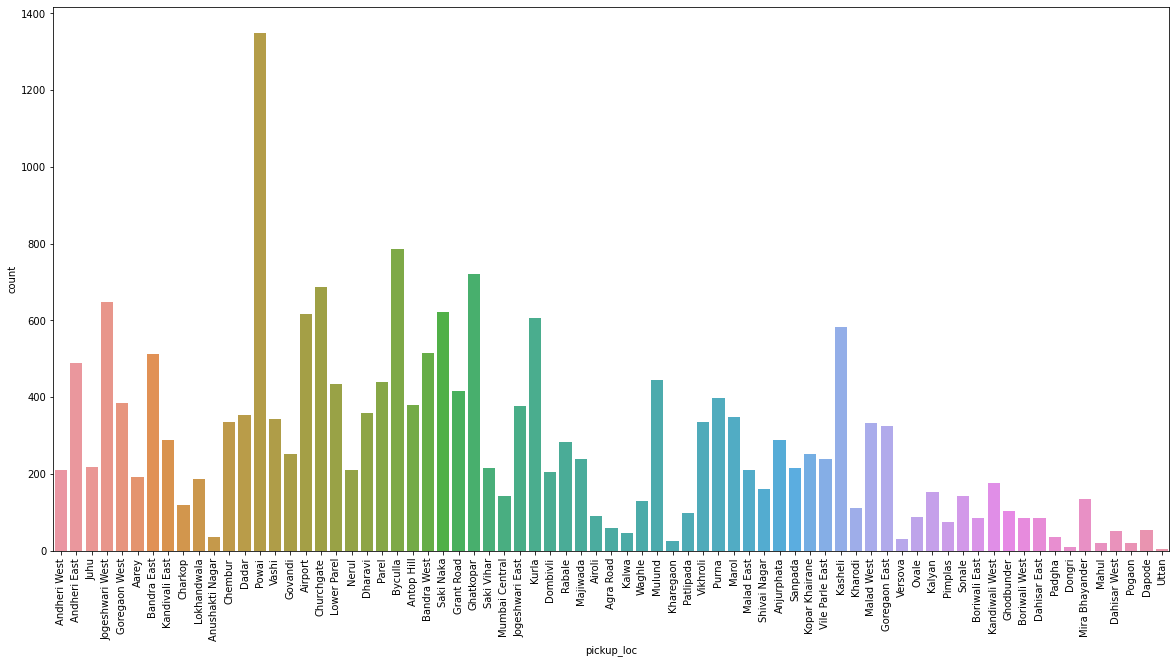

In [ ]:
#total no. of trips correspond to each pickup location
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='pickup_loc', data = cabs_data)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

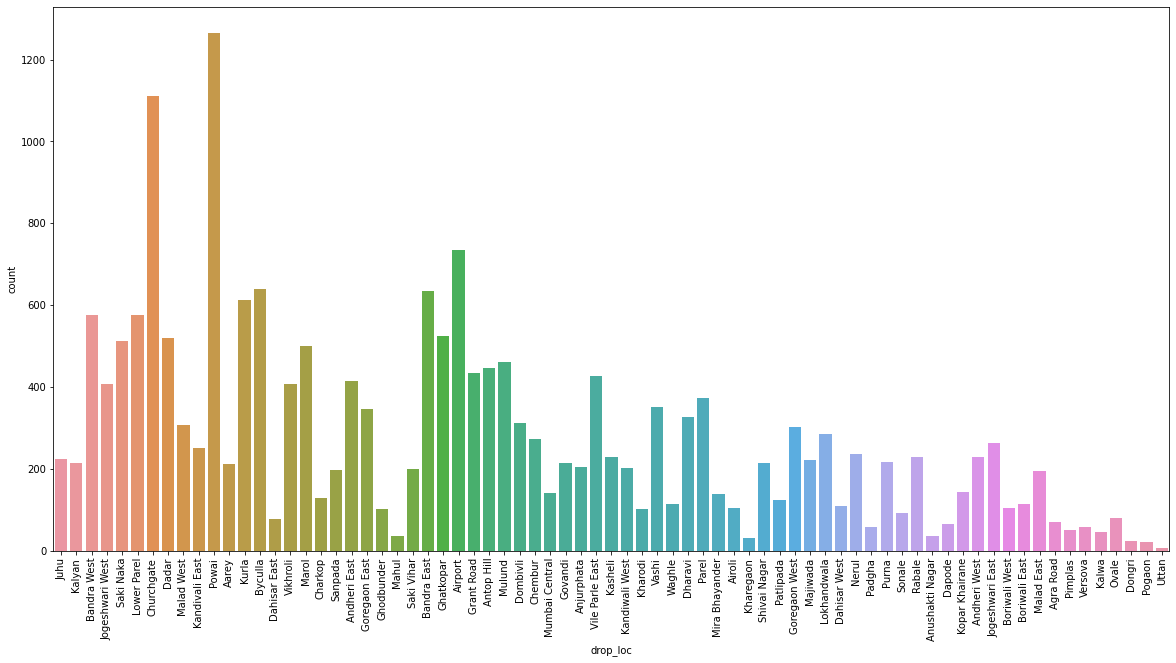

In [ ]:
#total trips to drop location
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='drop_loc', data = cabs_data)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

Here, we can see Powai is the busiest location as highest count of pickups and drops are on that location.

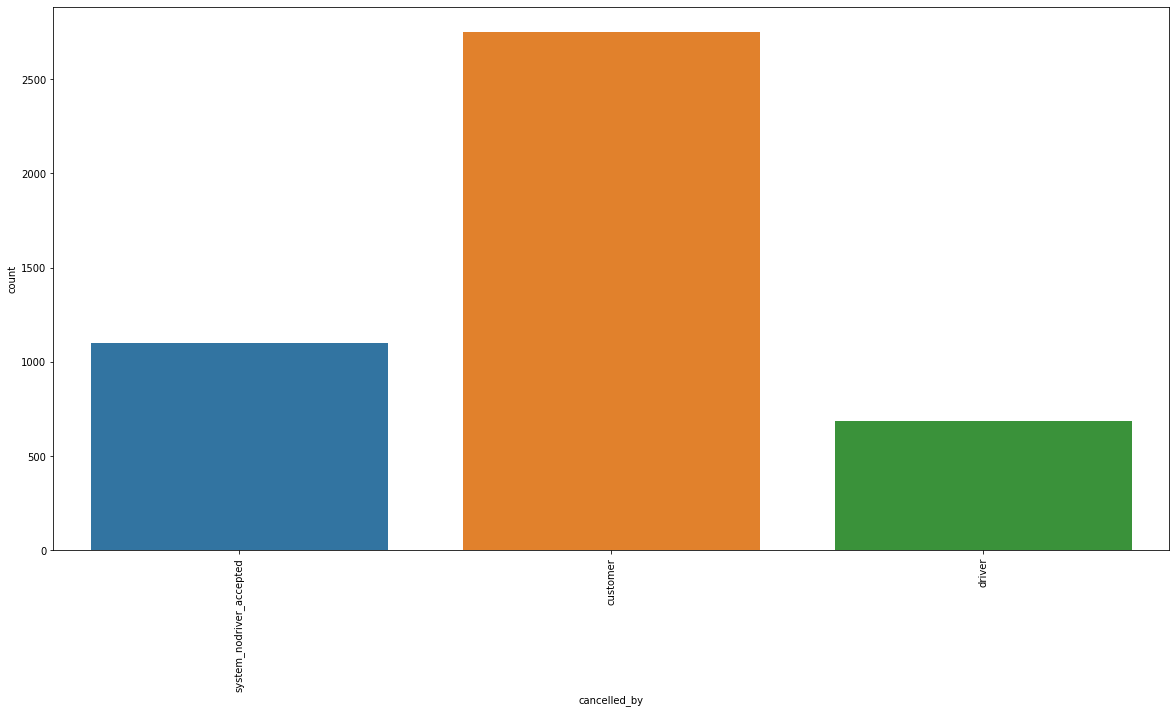

In [ ]:
#Ratio of cancelled rides by 3 category available
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='cancelled_by', data = cabs_data)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

In [ ]:
#exploring pickup time column
print("Most Recent date = ",cabs_data['pickup_time'].max())
print("Earliest Date = ",cabs_data['pickup_time'].min())
print("Difference between Dates = ",cabs_data['pickup_time'].max()-cabs_data['pickup_time'].min())

Most Recent date =  2019-01-14 23:54:09
Earliest Date =  2019-01-01 00:15:08
Difference between Dates =  13 days 23:39:01


In [ ]:
#deriving days of week and time in terms of hours
cabs_data["DayOfWeek_pick"]=cabs_data['pickup_time'].dt.day_name()
cabs_data["DayTime_pick"]=cabs_data['pickup_time'].dt.hour
cabs_data["DayOfWeek_drop"]=cabs_data['drop_time'].dt.day_name()
cabs_data["DayTime_drop"]=cabs_data['drop_time'].dt.hour
cabs_data.head()

,order_id,status,customer_id,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by,DayOfWeek_pick,DayTime_pick,DayOfWeek_drop,DayTime_drop
0,4824156,4,305169,10.0,2019-01-02 13:10:13,2019-01-02 13:32:19,2019-01-02 14:04:25,Andheri West,Juhu,1.70,NaN,Wednesday,13,Wednesday,14.0
1,4826642,4,498734,10.0,2019-01-02 16:45:56,2019-01-02 17:01:15,2019-01-02 21:08:13,Andheri East,Kalyan,47.03,NaN,Wednesday,16,Wednesday,21.0
2,4830467,4,125080,10.0,2019-01-03 11:25:48,2019-01-03 11:30:54,2019-01-03 13:02:43,Andheri West,Bandra West,7.93,NaN,Thursday,11,Thursday,13.0
3,4832599,4,107008,10.0,2019-01-03 14:50:58,2019-01-03 14:37:06,2019-01-03 15:09:52,Juhu,Jogeshwari West,6.35,NaN,Thursday,14,Thursday,15.0
4,4833444,4,278997,10.0,2019-01-03 15:36:29,2019-01-03 15:42:35,2019-01-03 17:29:24,Jogeshwari West,Saki Naka,8.48,NaN,Thursday,15,Thursday,17.0


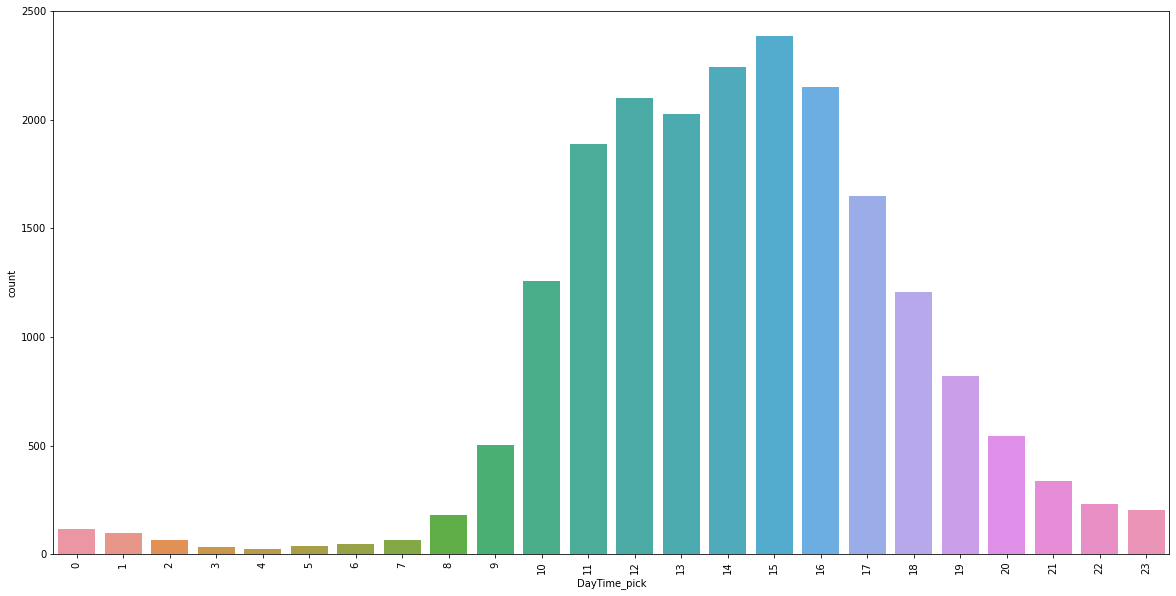

In [ ]:
#Ploting main business hours for trips(Pickup Time)
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='DayTime_pick', data = cabs_data)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

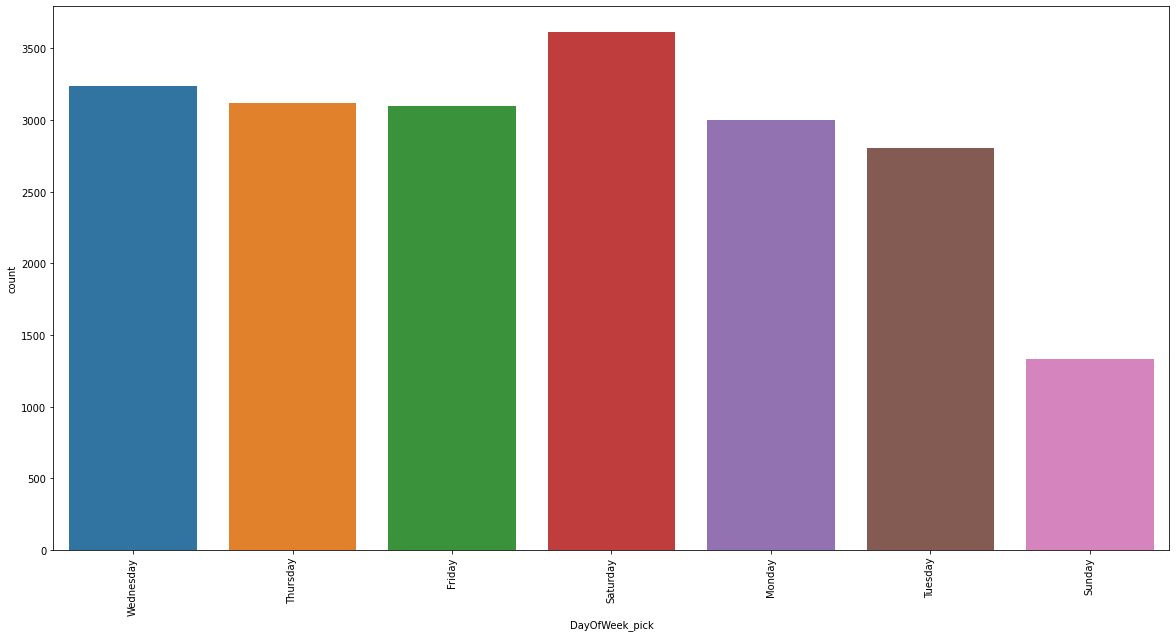

In [ ]:
#Total count of trips each day 
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='DayOfWeek_pick', data = cabs_data)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

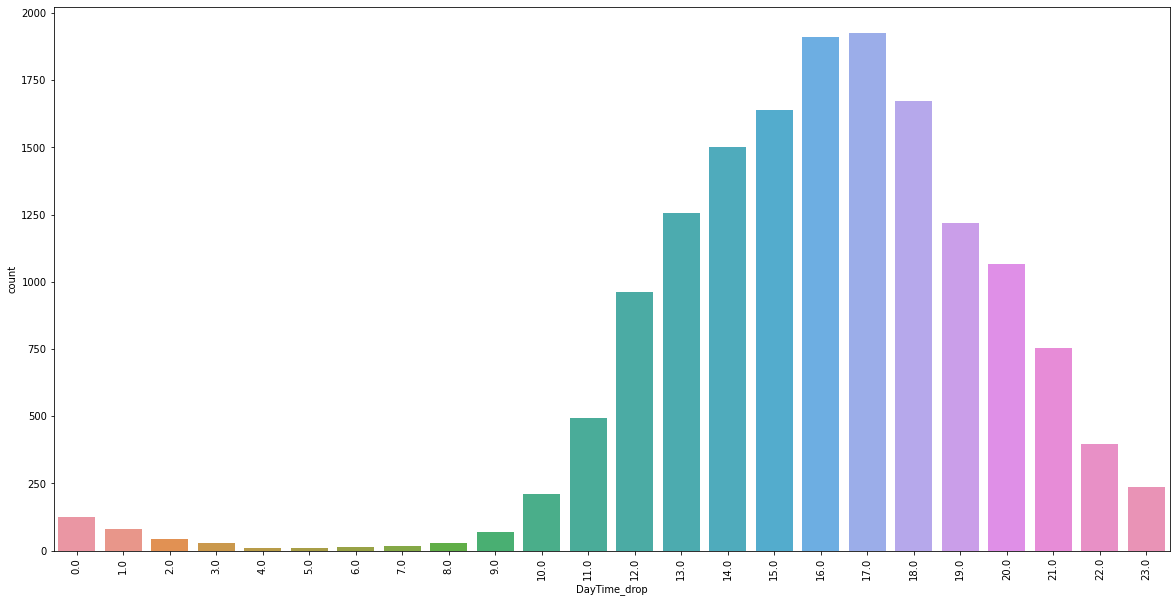

In [ ]:
#Ploting main business hours for trips(Drop Time)
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='DayTime_drop', data = cabs_data)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

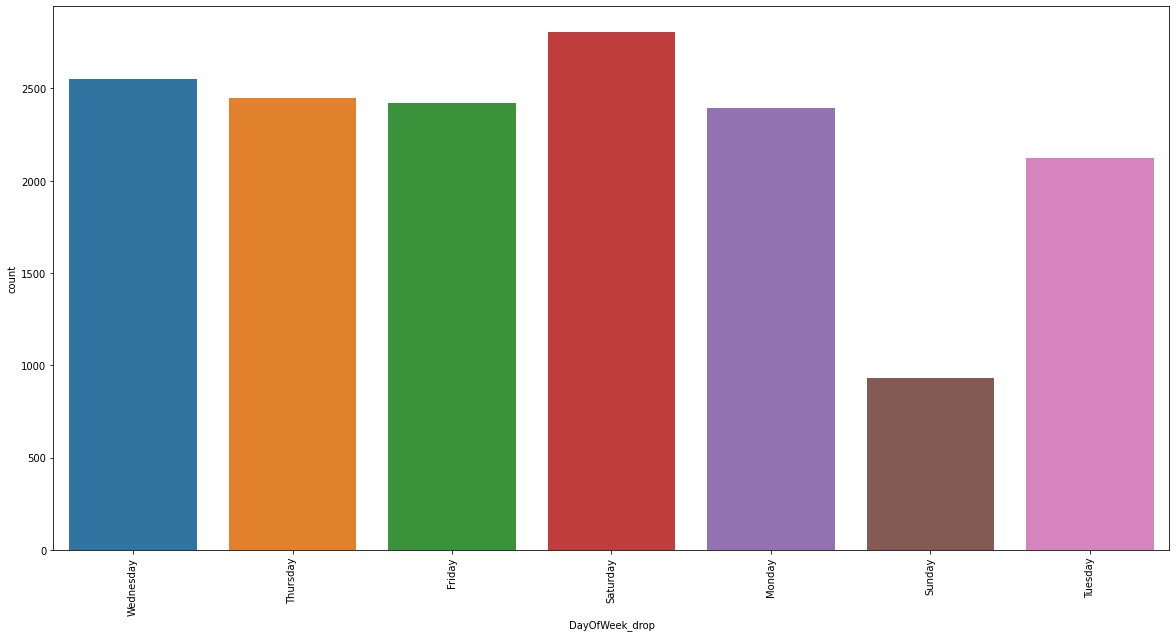

In [ ]:
#Total count of trips each day 
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='DayOfWeek_drop', data = cabs_data)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


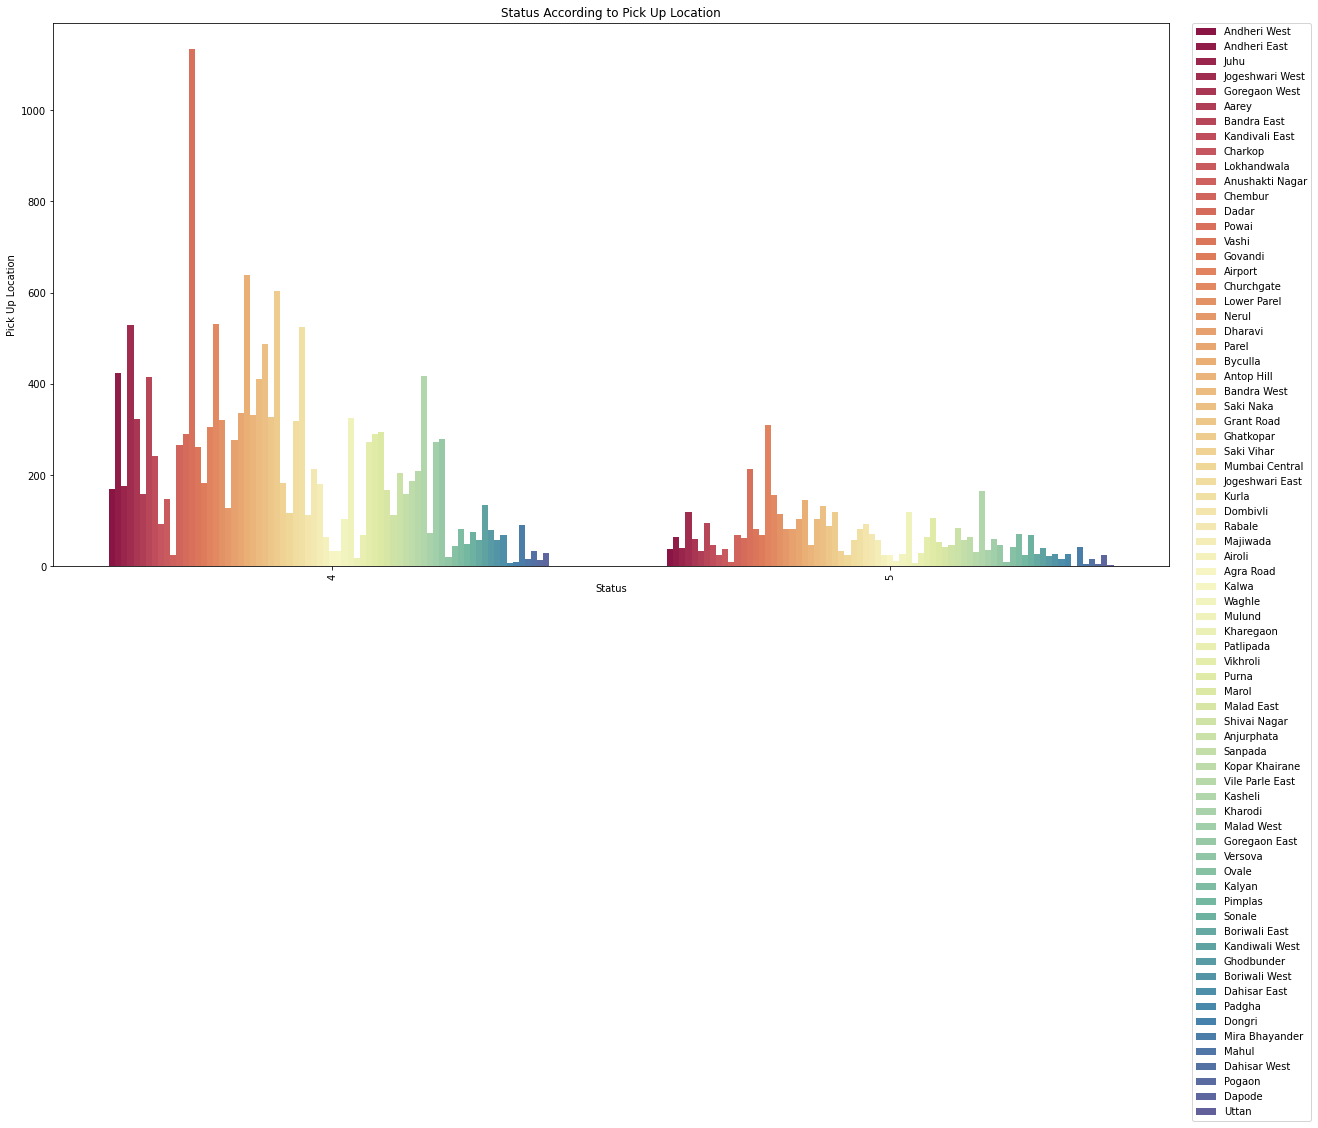

In [ ]:
#Status According to Pick Up Location
color = plt.cm.Spectral(np.linspace(0, 1, 74))
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cabs_data['status'], hue=cabs_data['pickup_loc'],palette=color)
plt.title("Status According to Pick Up Location")
plt.xlabel("Status")
plt.ylabel("Pick Up Location")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


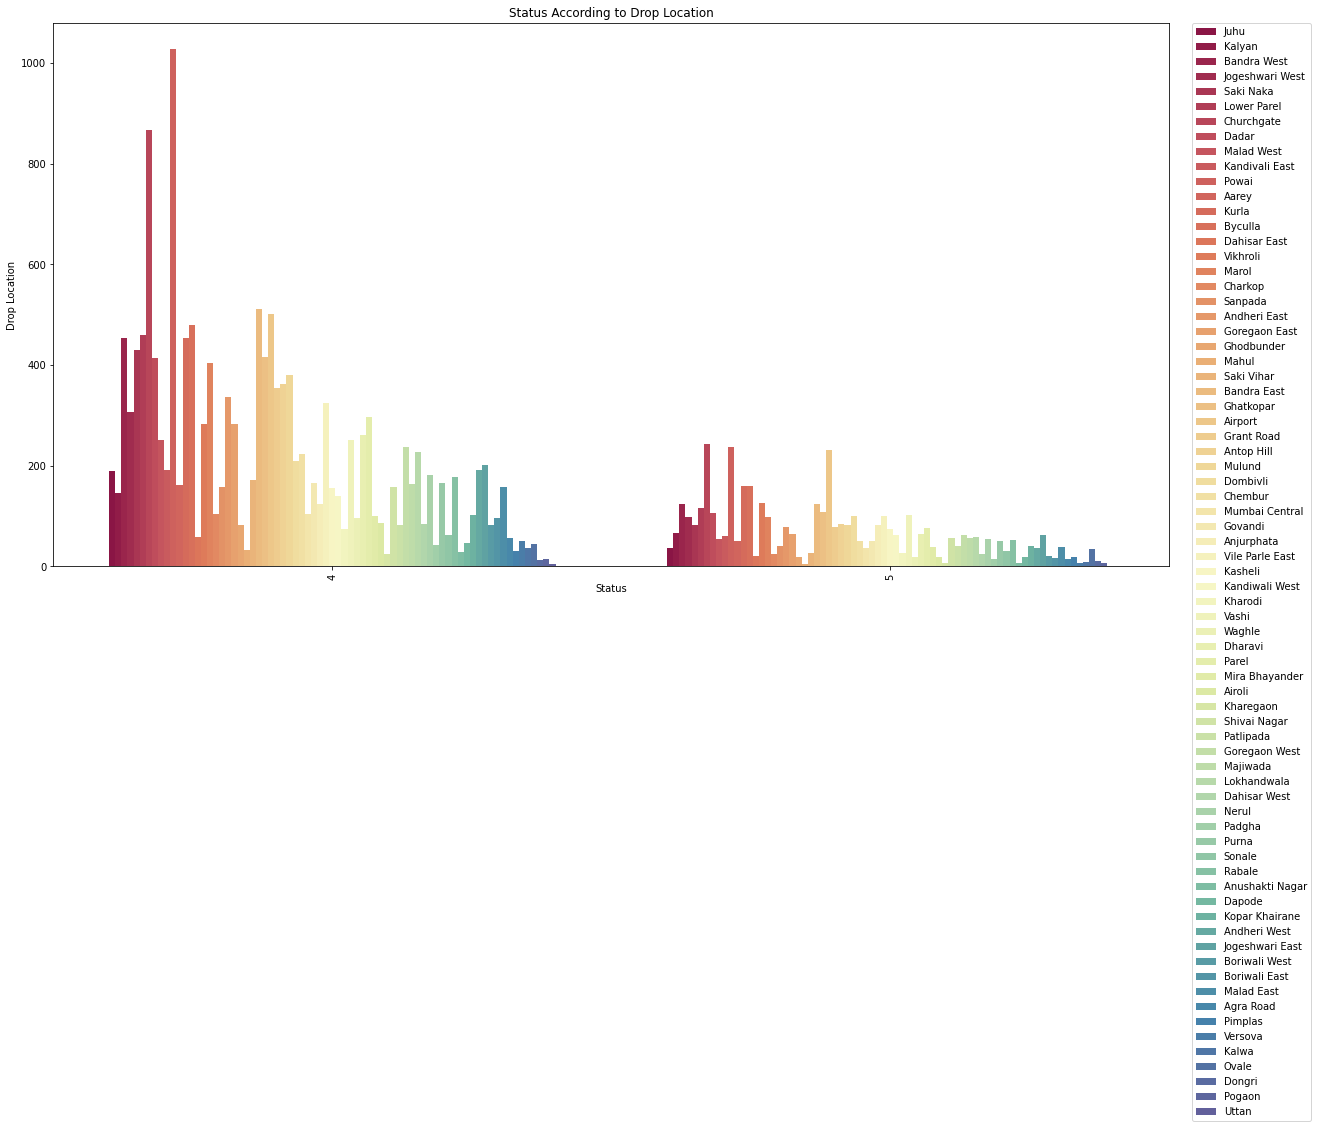

In [ ]:
#Status According to Drop Location
color = plt.cm.Spectral(np.linspace(0, 1, 74))
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cabs_data['status'], hue=cabs_data['drop_loc'],palette=color)
plt.title("Status According to Drop Location")
plt.xlabel("Status")
plt.ylabel("Drop Location")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


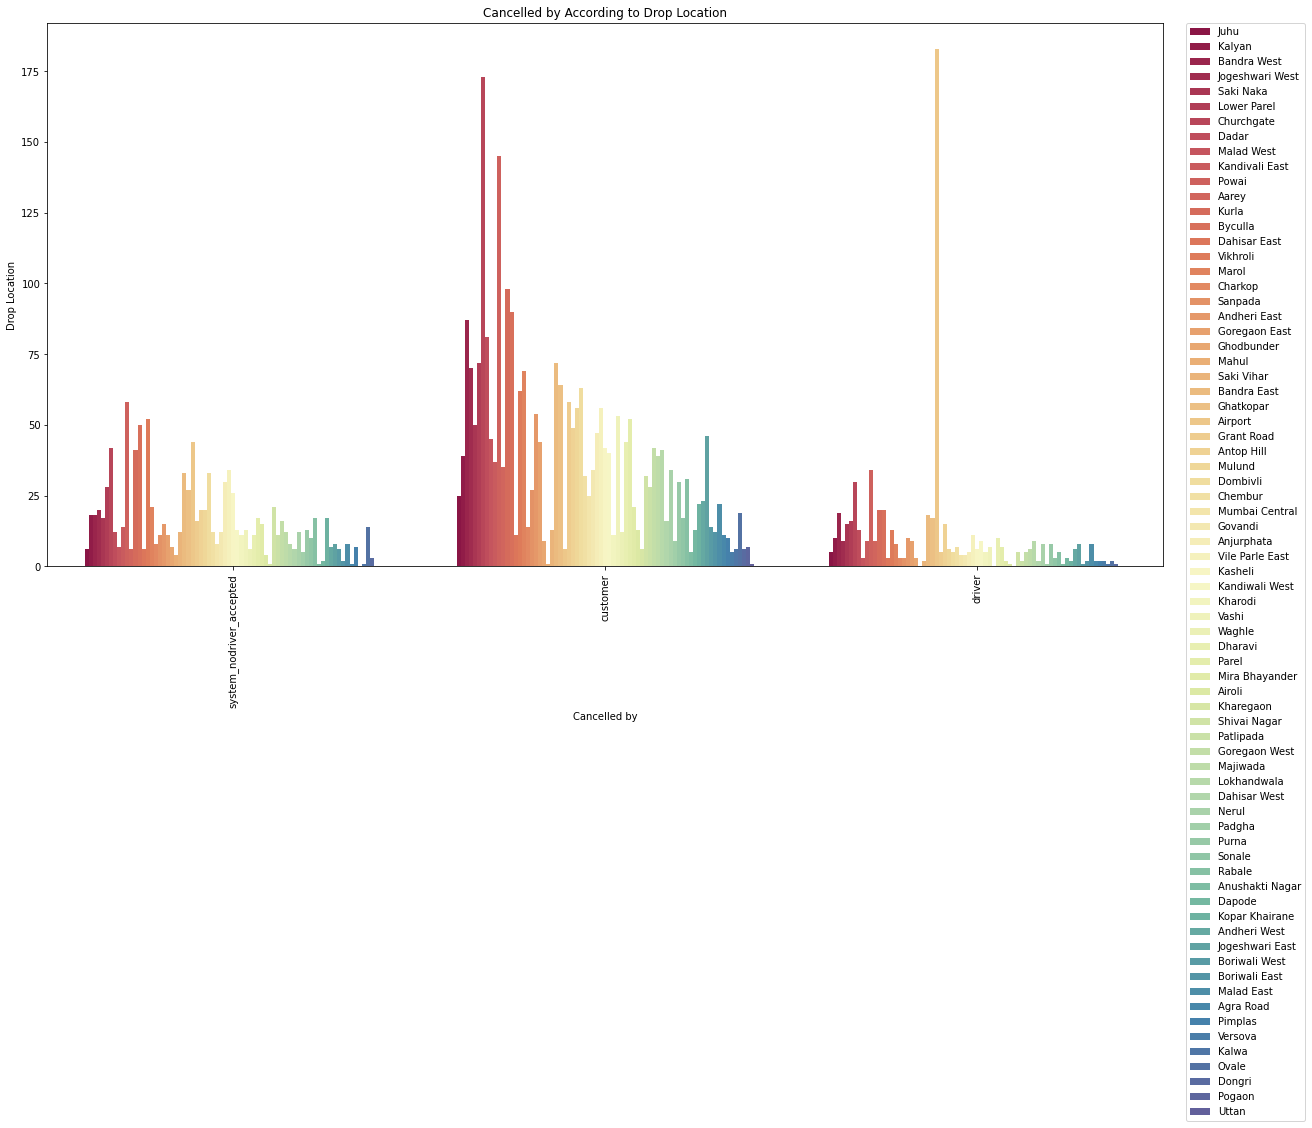

In [ ]:
#Cancelled by According to Drop Location
color = plt.cm.Spectral(np.linspace(0, 1, 74))
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cabs_data['cancelled_by'], hue=cabs_data['drop_loc'],palette=color)
plt.title("Cancelled by According to Drop Location")
plt.xlabel("Cancelled by")
plt.ylabel("Drop Location")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


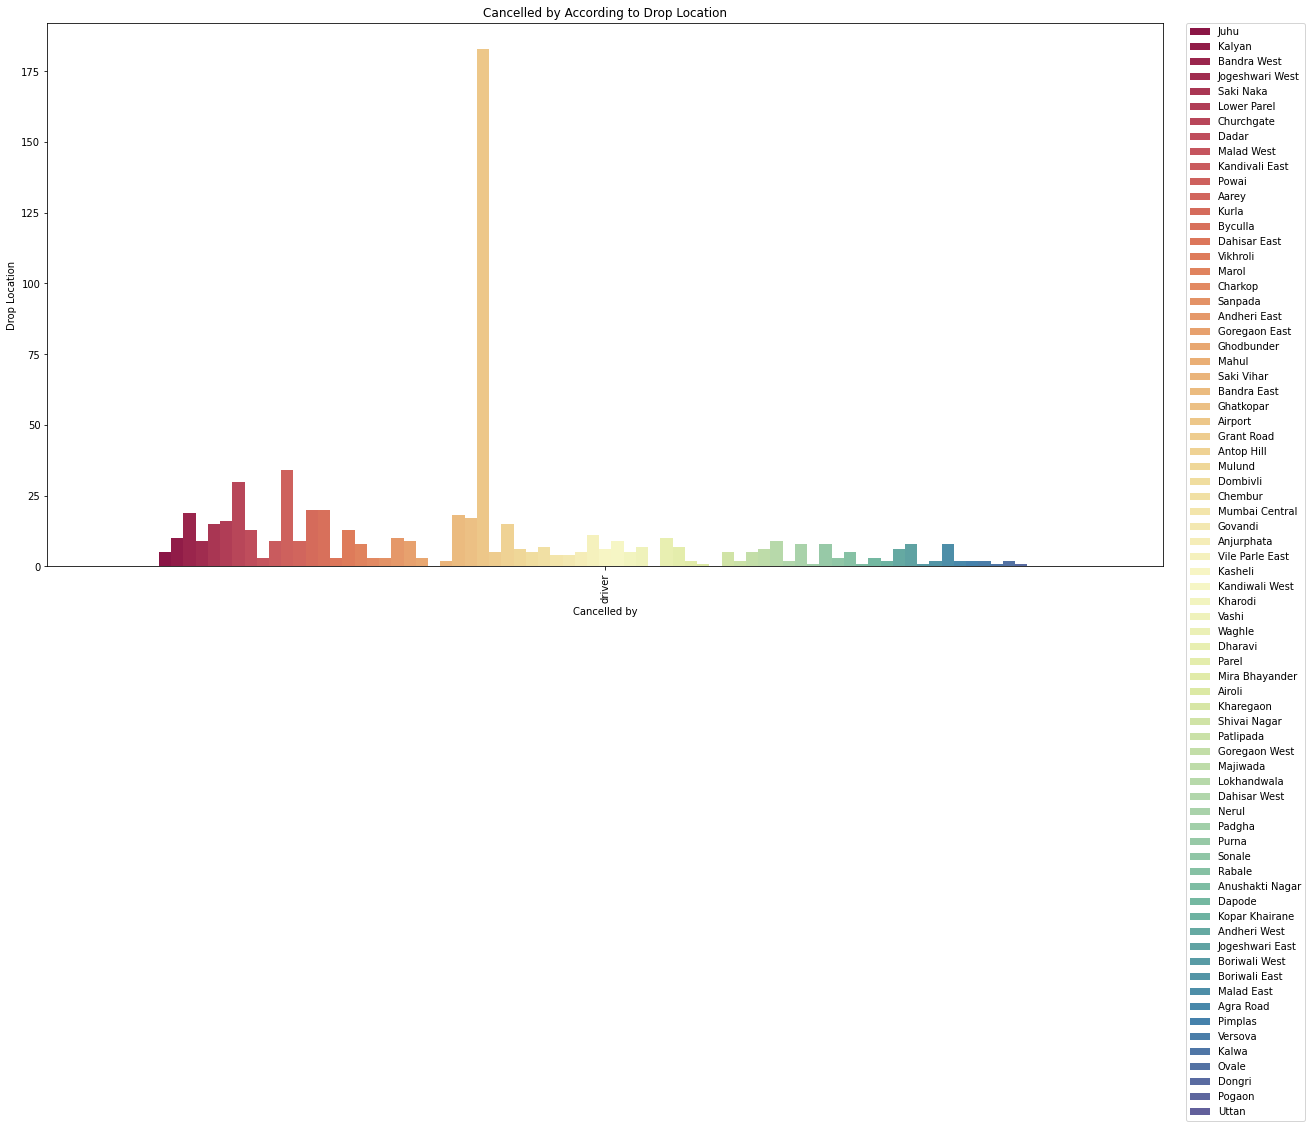

In [ ]:
color = plt.cm.Spectral(np.linspace(0, 1, 74))
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cabs_data[cabs_data['cancelled_by'] == "driver"]['cancelled_by'], hue=cabs_data['drop_loc'],palette=color)
plt.title("Cancelled by According to Drop Location")
plt.xlabel("Cancelled by")
plt.ylabel("Drop Location")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


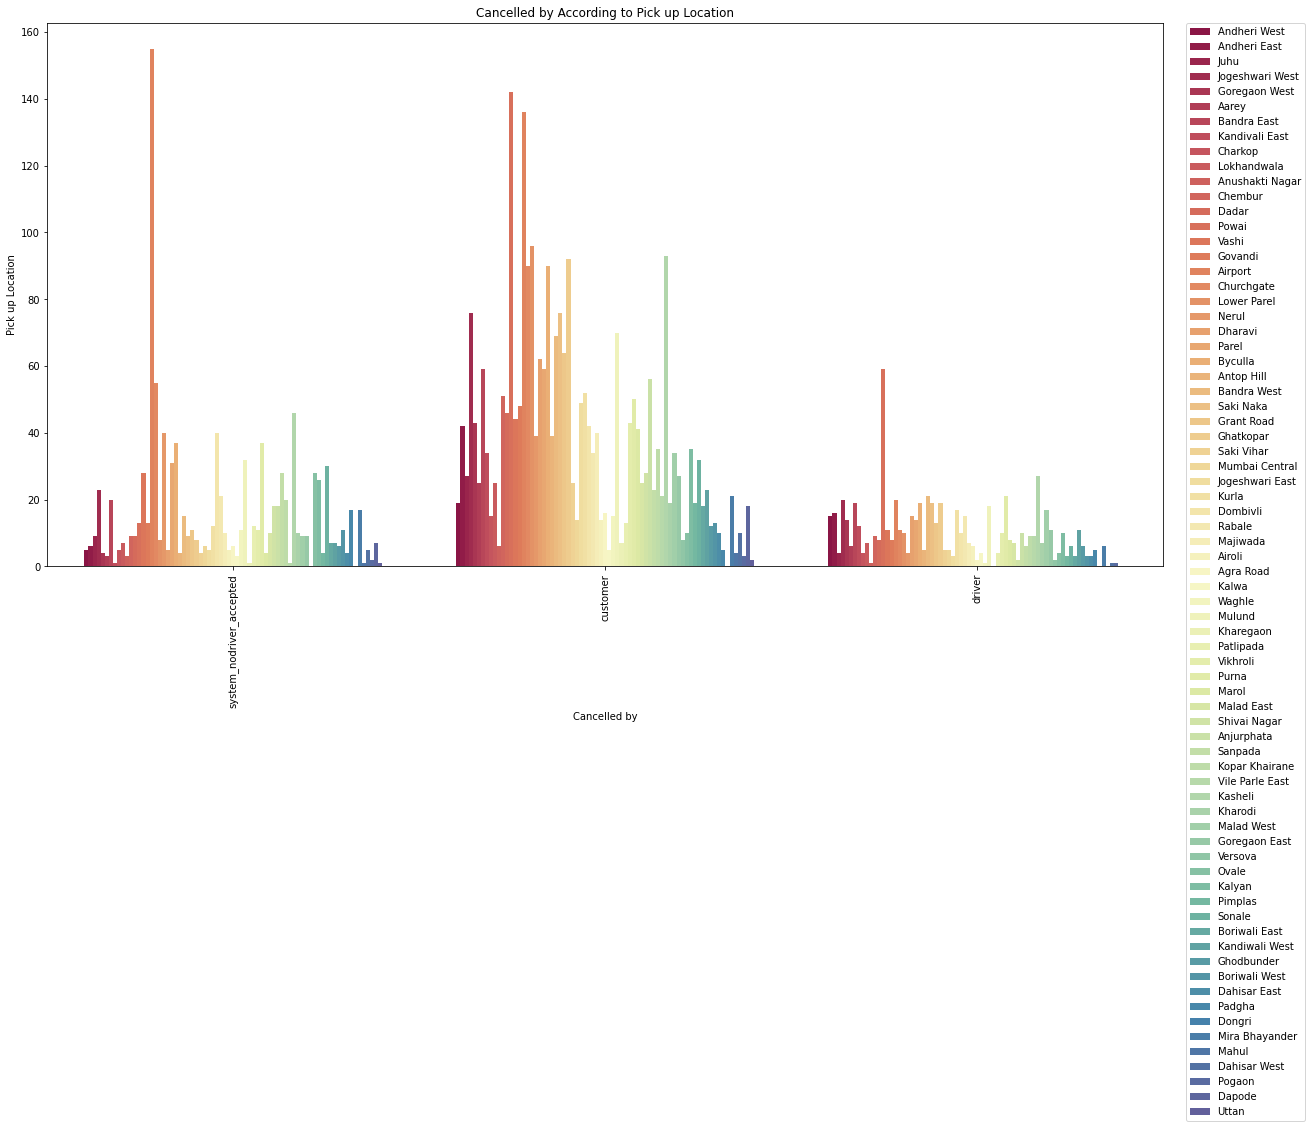

In [ ]:
color = plt.cm.Spectral(np.linspace(0, 1, 74))
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cabs_data['cancelled_by'], hue=cabs_data['pickup_loc'],palette=color)
plt.title("Cancelled by According to Pick up Location")
plt.xlabel("Cancelled by")
plt.ylabel("Pick up Location")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

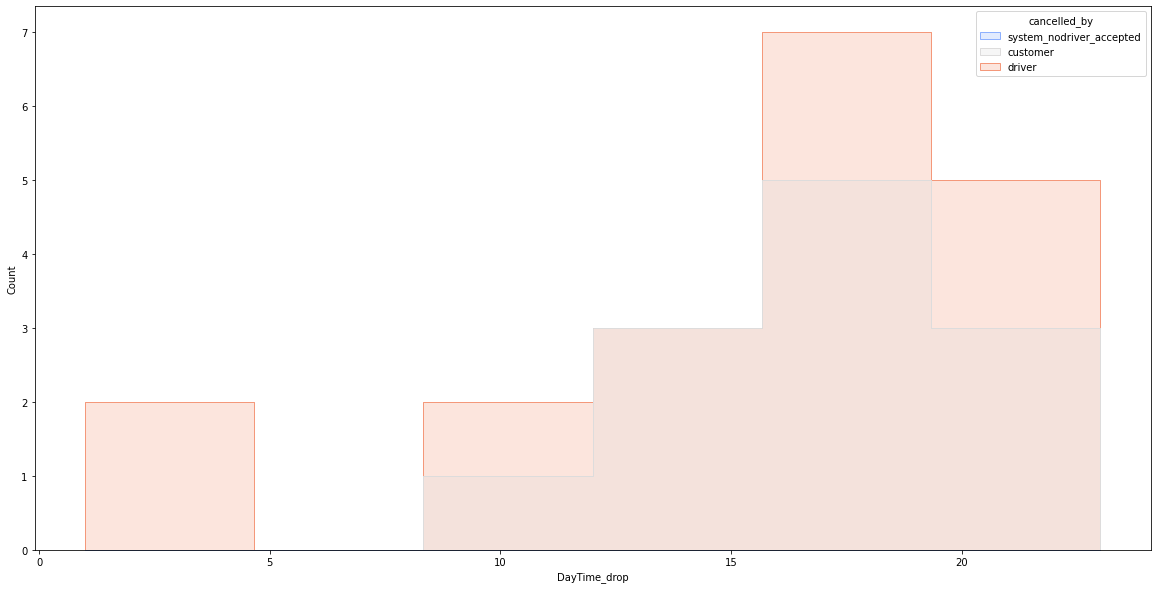

In [ ]:
#Cancelled Trips in particular hour of the day based on category due to drop location(driver,customer,system_error)
sns.histplot(cabs_data, x="DayTime_drop", hue="cancelled_by", element="step",palette='coolwarm' )
plt.show()

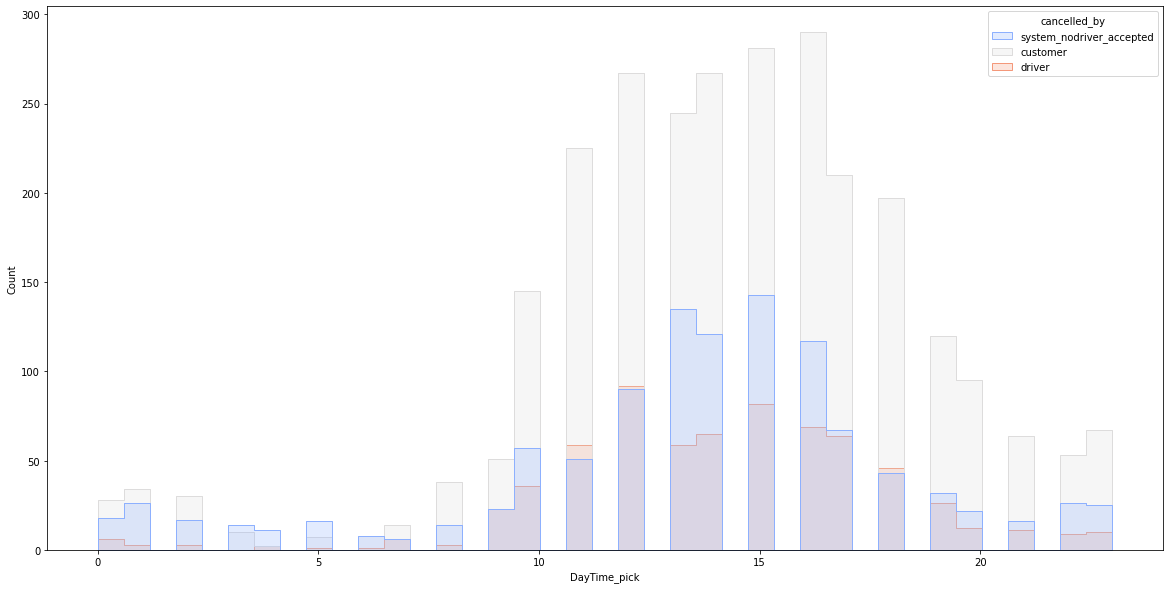

In [ ]:
#Cancelled Trips in particular hour of the day based on category due to Pickup location(driver,customer,system_error)
sns.histplot(cabs_data, x="DayTime_pick", hue="cancelled_by", element="step",palette='coolwarm' )
plt.show()

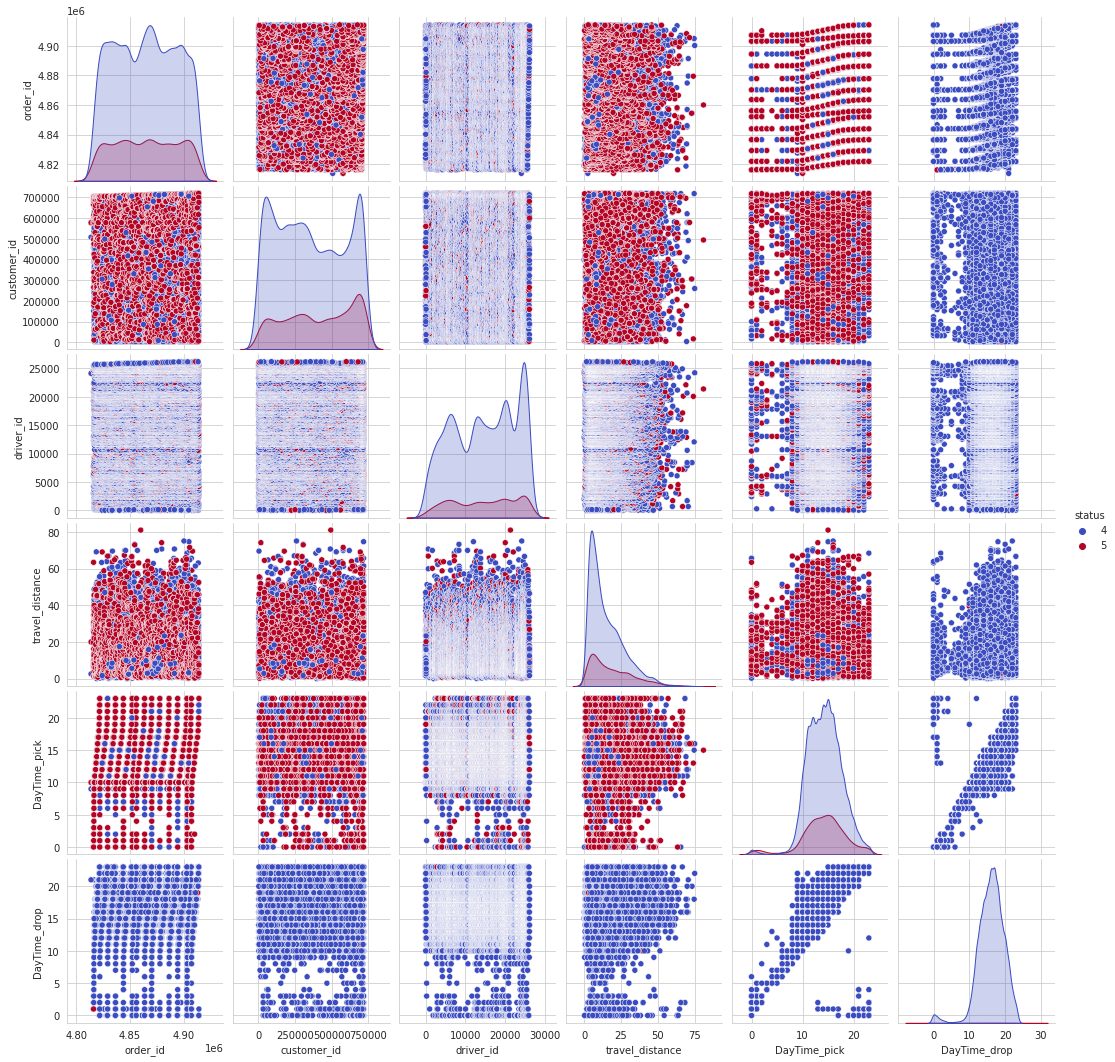

In [ ]:
#corelation analysis\
plt.rcParams['figure.figsize'] = (20, 10)
sns.set_style('whitegrid')
sns.pairplot(cabs_data, hue = "status",palette='coolwarm' );
plt.show()

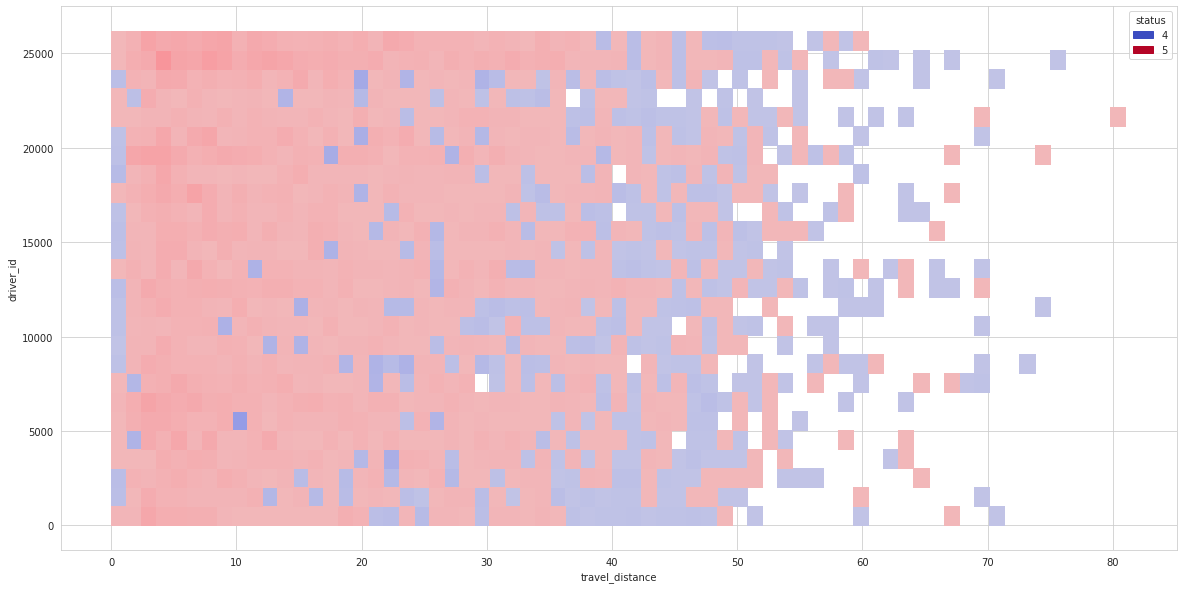

In [ ]:
#For what distance most of the trips are cancelled/completed 
sns.histplot(cabs_data, x="travel_distance", y="driver_id", hue="status",palette='coolwarm' )
plt.show()

In [ ]:
#getting cancelled trips only
Total_cab_cancel = cabs_data[cabs_data["status"] == 5].groupby(["driver_id","status","pickup_loc","drop_loc"])["travel_distance"].count().to_frame(name = 'count').reset_index()
Total_cab_cancel.head()

,driver_id,status,pickup_loc,drop_loc,count
0,10.0,5,Andheri East,Goregaon East,1
1,10.0,5,Andheri West,Byculla,1
2,10.0,5,Goregaon West,Jogeshwari West,1
3,10.0,5,Jogeshwari West,Aarey,2
4,10.0,5,Jogeshwari West,Powai,2


In [ ]:
#airport trips are cancelled(picking up from airport)
Total_cab_cancel_pickt = cabs_data[(cabs_data["status"] == 5) & (cabs_data["pickup_loc"] == "Airport")].groupby(["driver_id","status","pickup_loc","drop_loc","pickup_time"])["travel_distance"].count().to_frame(name = 'count').reset_index()
Total_cab_cancel_pickt

,driver_id,status,pickup_loc,drop_loc,pickup_time,count
0,662.0,5,Airport,Churchgate,2019-01-02 21:59:57,1
1,662.0,5,Airport,Dahisar East,2019-01-02 16:54:00,1
2,662.0,5,Airport,Marol,2019-01-12 13:46:36,1
3,774.0,5,Airport,Saki Naka,2019-01-09 15:40:38,1
4,1046.0,5,Airport,Ghatkopar,2019-01-10 12:41:49,1
...,...,...,...,...,...,...
87,25060.0,5,Airport,Jogeshwari West,2019-01-02 13:52:03,1
88,25060.0,5,Airport,Kurla,2019-01-01 17:15:05,1
89,25236.0,5,Airport,Mulund,2019-01-10 17:14:36,1
90,25462.0,5,Airport,Agra Road,2019-01-03 20:03:16,1


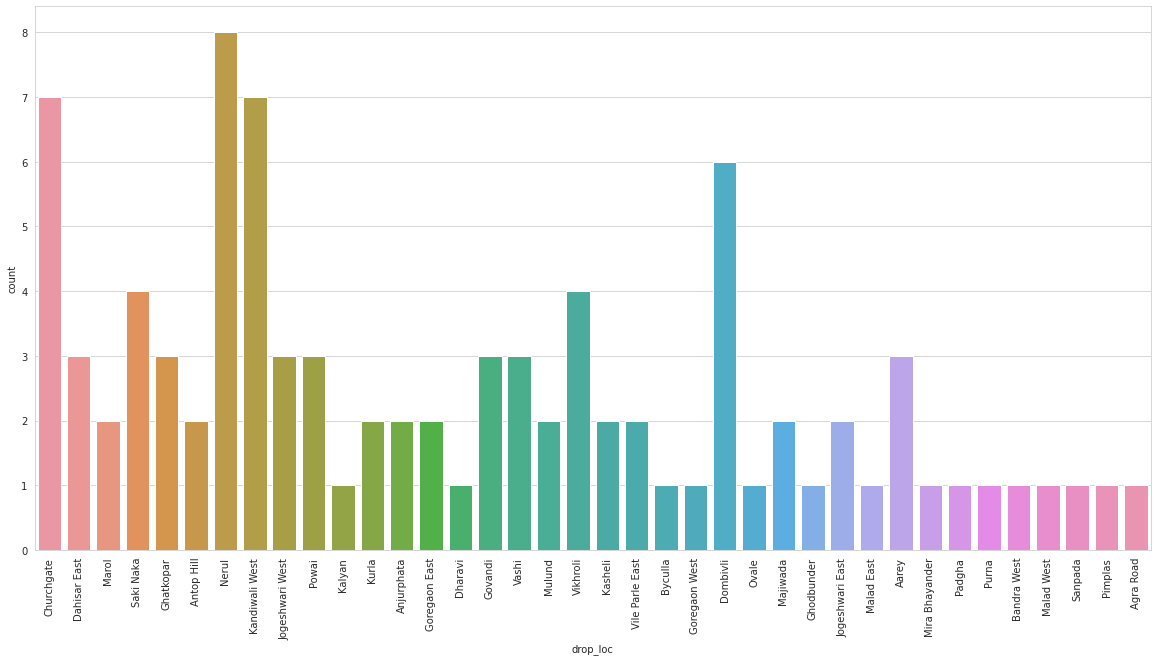

In [ ]:
#for which location most trips were denied
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='drop_loc', data = Total_cab_cancel_pickt)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

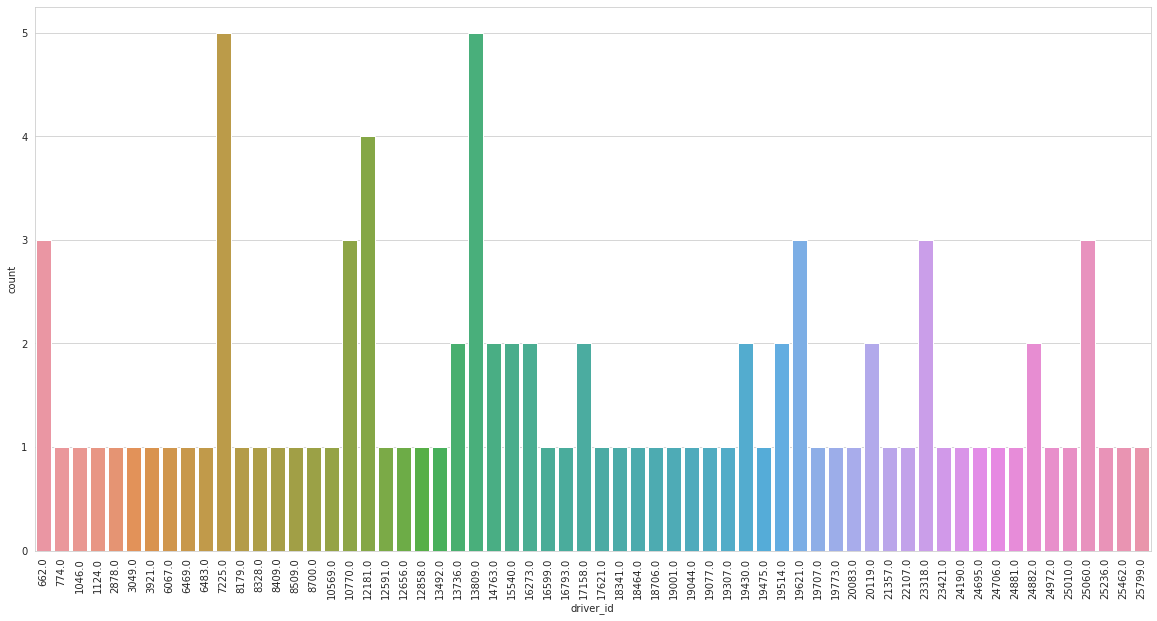

In [ ]:
#Trips denied count by driver
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='driver_id', data = Total_cab_cancel_pickt)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

In [ ]:
#filtering where drop location is airport
Total_cab_cancel_dropl = cabs_data[(cabs_data["status"] == 5) & (cabs_data["drop_loc"] == "Airport")].groupby(["driver_id","status","pickup_loc","drop_loc","pickup_time"])["travel_distance"].count().to_frame(name = 'count').reset_index()
Total_cab_cancel_dropl

,driver_id,status,pickup_loc,drop_loc,pickup_time,count
0,12.0,5,Govandi,Airport,2019-01-09 20:38:21,1
1,37.0,5,Parel,Airport,2019-01-11 11:00:22,1
2,1273.0,5,Vikhroli,Airport,2019-01-10 08:09:50,1
3,1692.0,5,Grant Road,Airport,2019-01-12 11:46:06,1
4,1882.0,5,Dombivli,Airport,2019-01-14 18:09:11,1
...,...,...,...,...,...,...
140,25462.0,5,Patlipada,Airport,2019-01-08 12:18:25,1
141,25471.0,5,Malad West,Airport,2019-01-03 12:14:00,1
142,25782.0,5,Bandra West,Airport,2019-01-08 15:58:54,1
143,25799.0,5,Kalyan,Airport,2019-01-07 12:06:30,1


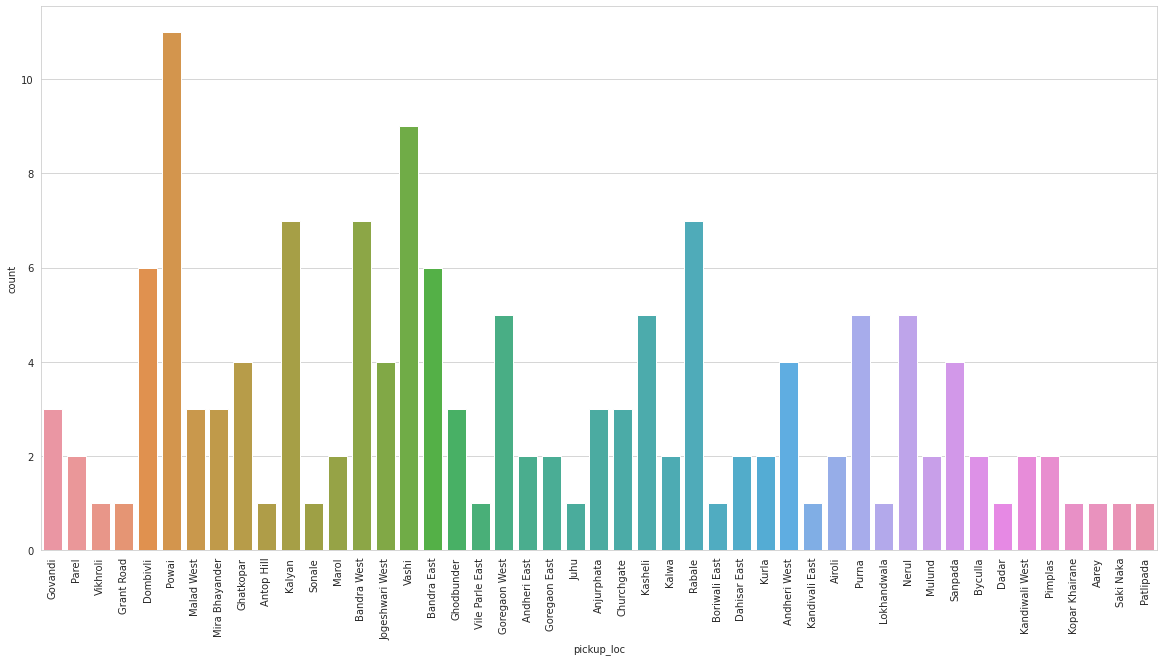

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='pickup_loc', data = Total_cab_cancel_dropl)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

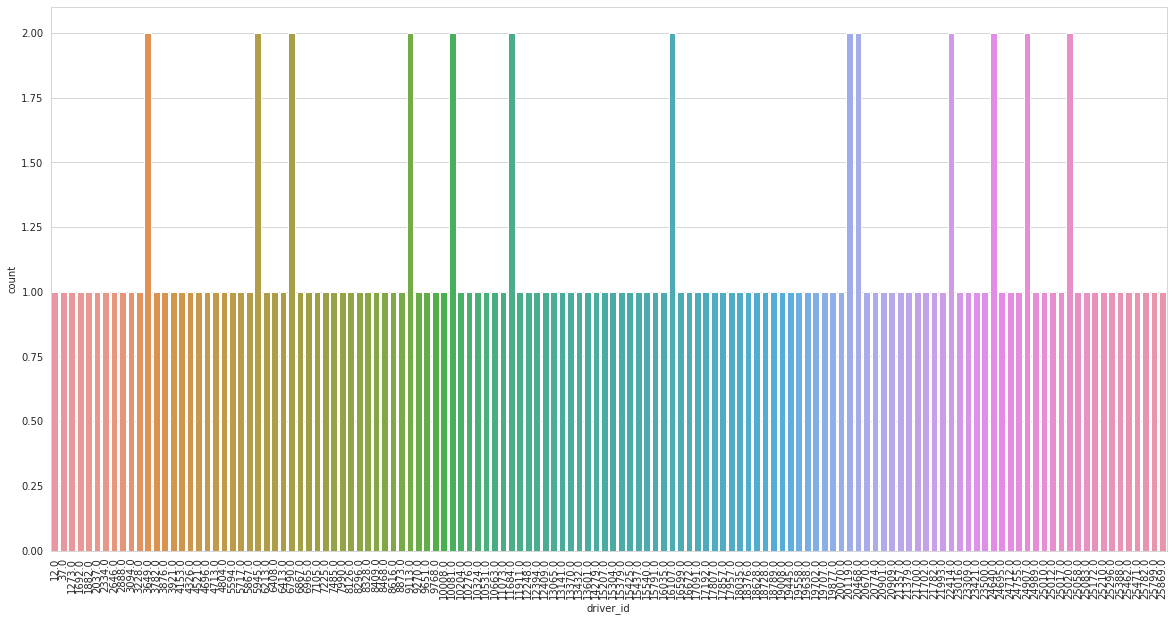

In [ ]:
#trip denial count of driver
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='driver_id', data = Total_cab_cancel_dropl)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

In [ ]:
#filtering data where either of pickup or drop location is Airport
canc_trip_loc = cabs_data[(cabs_data["status"] == 5) & ((cabs_data["pickup_loc"] == "Airport") | (cabs_data["drop_loc"] == "Airport")) ].reset_index()
canc_trip_loc

,index,order_id,status,customer_id,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by,DayOfWeek_pick,DayTime_pick,DayOfWeek_drop,DayTime_drop
0,37,4877511,5,418649,12.0,2019-01-09 20:38:21,NaT,NaT,Govandi,Airport,26.77,driver,Wednesday,20,NaN,NaN
1,50,4887251,5,482844,37.0,2019-01-11 11:00:22,NaT,NaT,Parel,Airport,34.05,driver,Friday,11,NaN,NaN
2,384,4826793,5,184657,662.0,2019-01-02 16:54:00,NaT,NaT,Airport,Dahisar East,28.46,customer,Wednesday,16,NaN,NaN
3,385,4829023,5,267618,662.0,2019-01-02 21:59:57,NaT,NaT,Airport,Churchgate,66.86,customer,Wednesday,21,NaN,NaN
4,390,4897696,5,65588,662.0,2019-01-12 13:46:36,NaT,NaT,Airport,Marol,48.89,customer,Saturday,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,20144,4911928,5,164782,NaN,2019-01-14 17:08:31,NaT,NaT,Airport,Saki Naka,45.82,system_nodriver_accepted,Monday,17,NaN,NaN
539,20146,4912091,5,164782,NaN,2019-01-14 17:16:41,NaT,NaT,Airport,Saki Naka,45.82,system_nodriver_accepted,Monday,17,NaN,NaN
540,20149,4912719,5,164782,NaN,2019-01-14 17:44:30,NaT,NaT,Airport,Saki Naka,45.82,system_nodriver_accepted,Monday,17,NaN,NaN
541,20151,4912902,5,377219,NaN,2019-01-14 17:53:45,NaT,NaT,Airport,Kasheli,22.28,system_nodriver_accepted,Monday,17,NaN,NaN


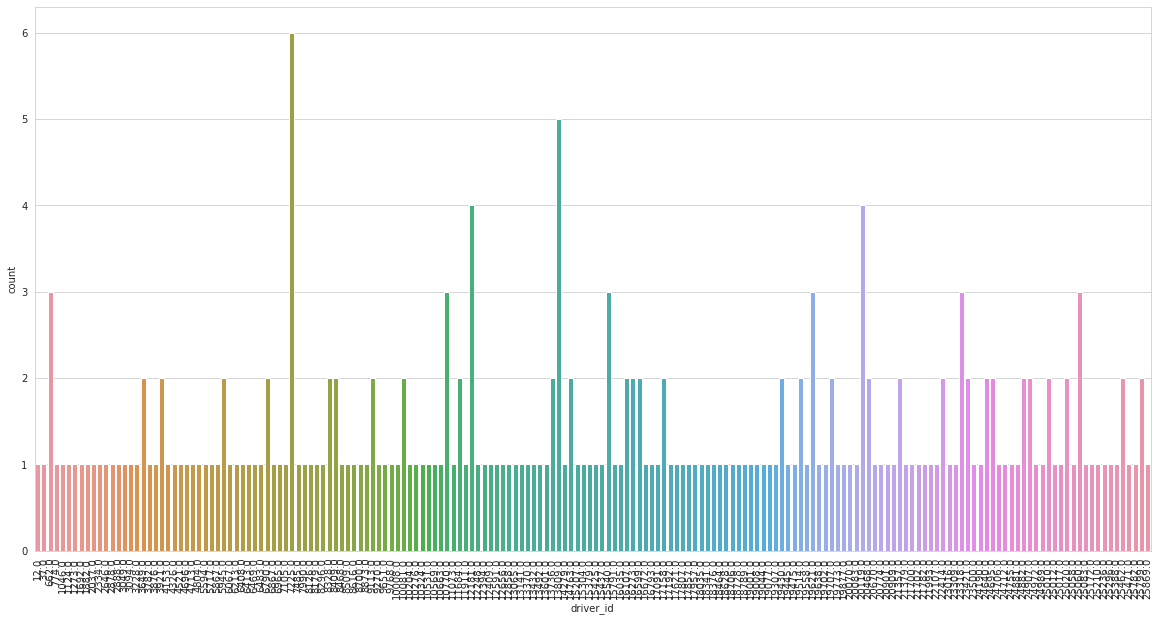

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='driver_id', data = canc_trip_loc)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

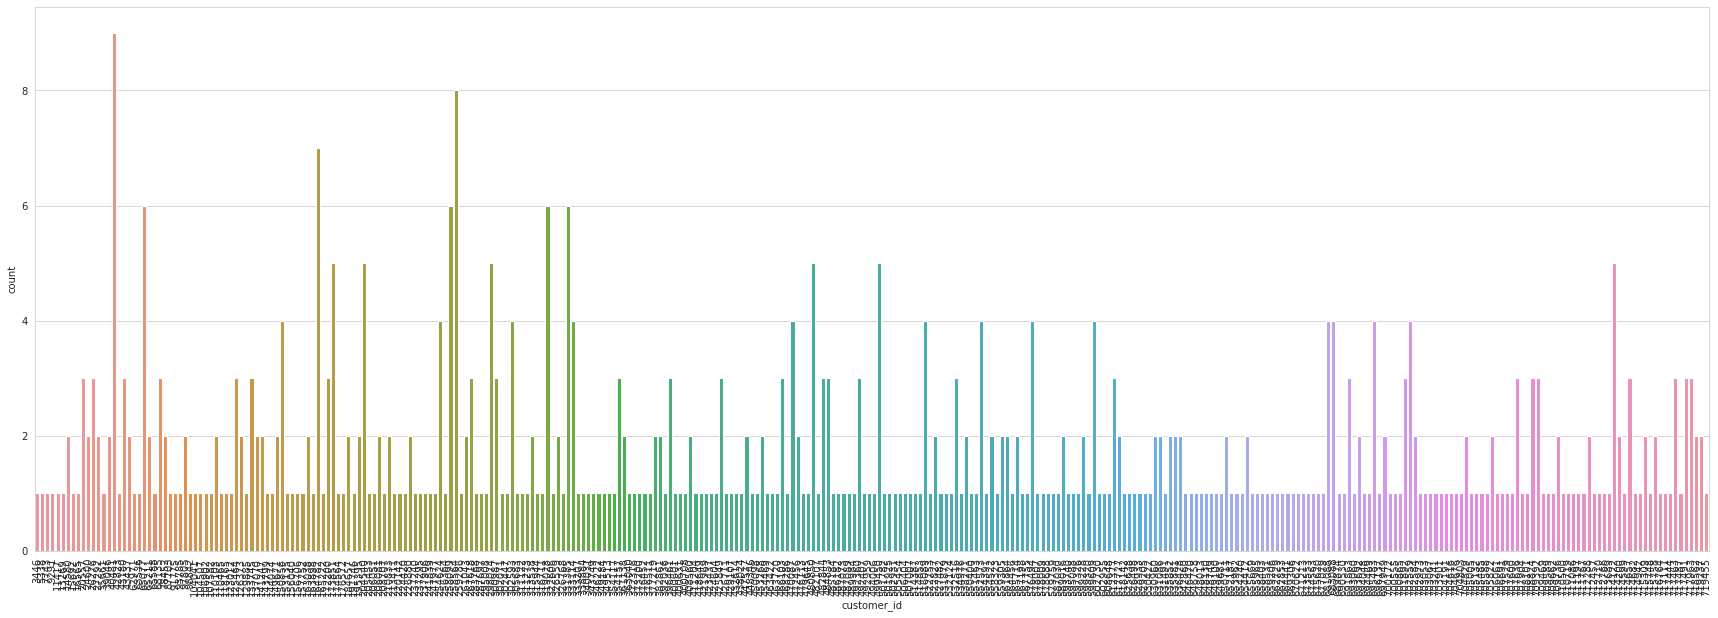

In [ ]:

plt.rcParams['figure.figsize'] = (30, 10)
# count plot on single categorical variable 
sns.countplot(x ='customer_id', data = canc_trip_loc)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

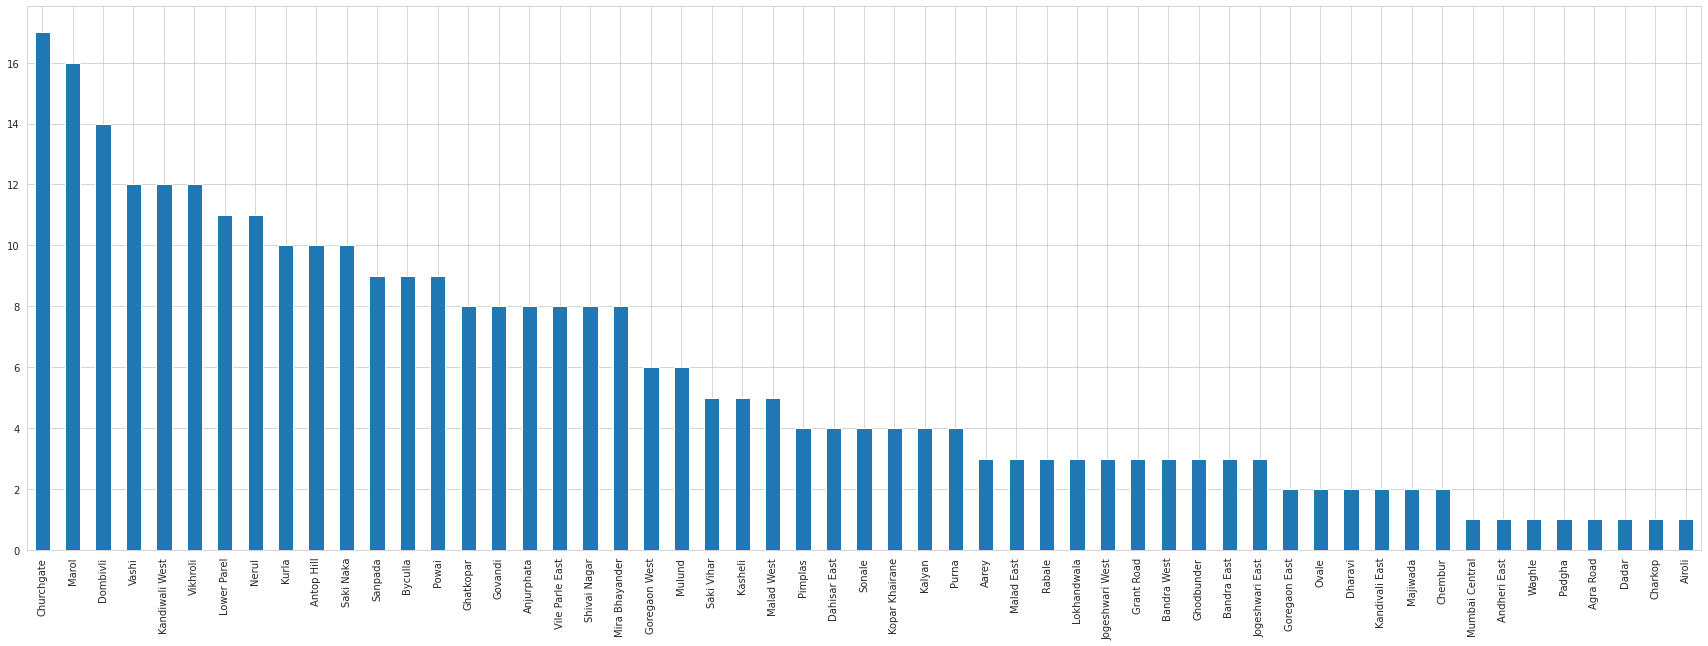

In [ ]:
canc_trip_loc[canc_trip_loc["drop_loc"] != "Airport"]['drop_loc'].value_counts().plot(kind="bar")
plt.show()

In [ ]:
canc_trip_loc[canc_trip_loc["pickup_loc"] != "Airport"]['pickup_loc'].value_counts().plot(kind="bar")
plt.show()

In [ ]:
#deriving days of week and time in terms of hours
canc_trip_loc["DayOfWeek_pick"]=canc_trip_loc['pickup_time'].dt.day_name()
canc_trip_loc["DayTime_pick"]=canc_trip_loc['pickup_time'].dt.hour
canc_trip_loc["DayOfWeek_drop"]=canc_trip_loc['drop_time'].dt.day_name()
canc_trip_loc["DayTime_drop"]=canc_trip_loc['drop_time'].dt.hour
canc_trip_loc

,index,order_id,status,customer_id,driver_id,pickup_time,start_time,drop_time,pickup_loc,drop_loc,travel_distance,cancelled_by,DayOfWeek_pick,DayTime_pick,DayOfWeek_drop,DayTime_drop
0,37,4877511,5,418649,12.0,2019-01-09 20:38:21,NaT,NaT,Govandi,Airport,26.77,driver,Wednesday,20,NaN,NaN
1,50,4887251,5,482844,37.0,2019-01-11 11:00:22,NaT,NaT,Parel,Airport,34.05,driver,Friday,11,NaN,NaN
2,384,4826793,5,184657,662.0,2019-01-02 16:54:00,NaT,NaT,Airport,Dahisar East,28.46,customer,Wednesday,16,NaN,NaN
3,385,4829023,5,267618,662.0,2019-01-02 21:59:57,NaT,NaT,Airport,Churchgate,66.86,customer,Wednesday,21,NaN,NaN
4,390,4897696,5,65588,662.0,2019-01-12 13:46:36,NaT,NaT,Airport,Marol,48.89,customer,Saturday,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,20144,4911928,5,164782,NaN,2019-01-14 17:08:31,NaT,NaT,Airport,Saki Naka,45.82,system_nodriver_accepted,Monday,17,NaN,NaN
539,20146,4912091,5,164782,NaN,2019-01-14 17:16:41,NaT,NaT,Airport,Saki Naka,45.82,system_nodriver_accepted,Monday,17,NaN,NaN
540,20149,4912719,5,164782,NaN,2019-01-14 17:44:30,NaT,NaT,Airport,Saki Naka,45.82,system_nodriver_accepted,Monday,17,NaN,NaN
541,20151,4912902,5,377219,NaN,2019-01-14 17:53:45,NaT,NaT,Airport,Kasheli,22.28,system_nodriver_accepted,Monday,17,NaN,NaN


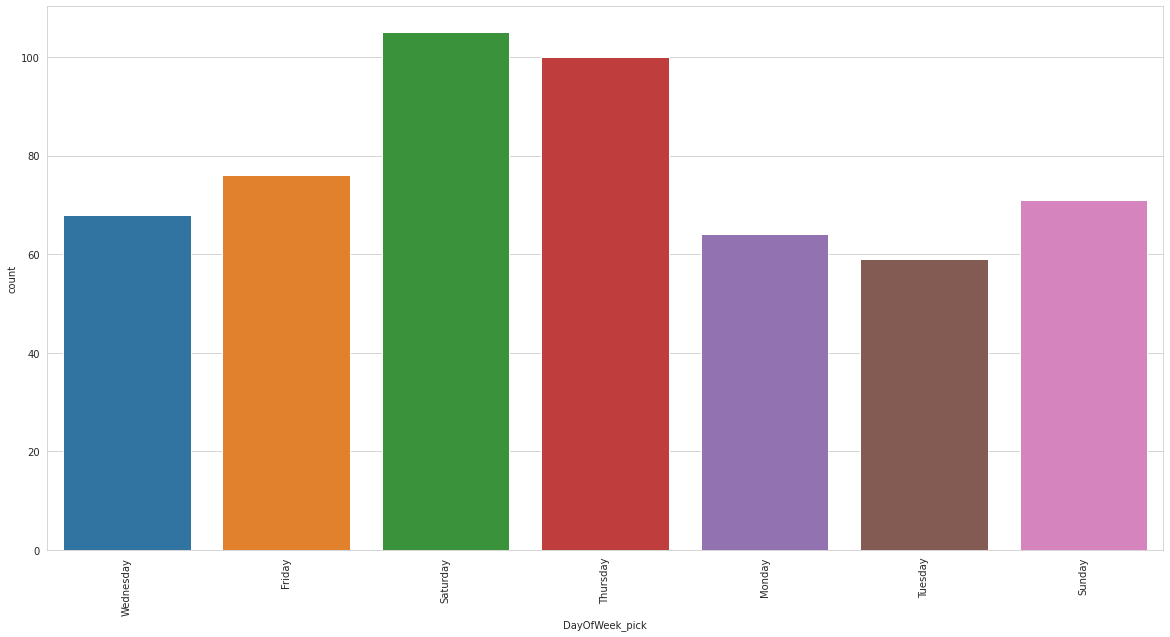

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='DayOfWeek_pick', data = canc_trip_loc)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

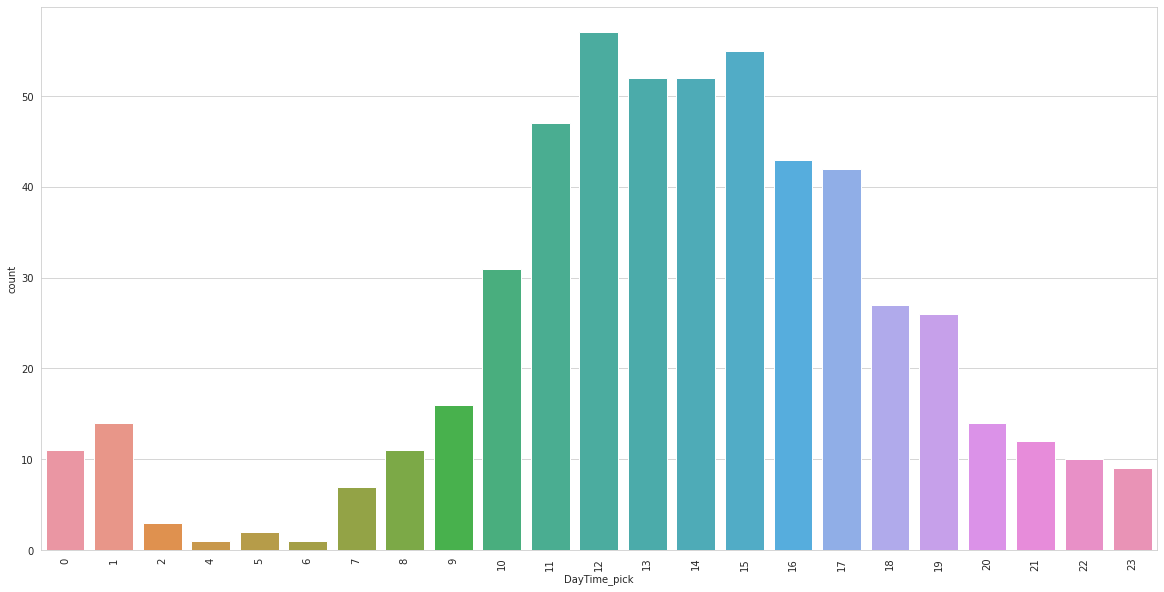

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='DayTime_pick', data = canc_trip_loc)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

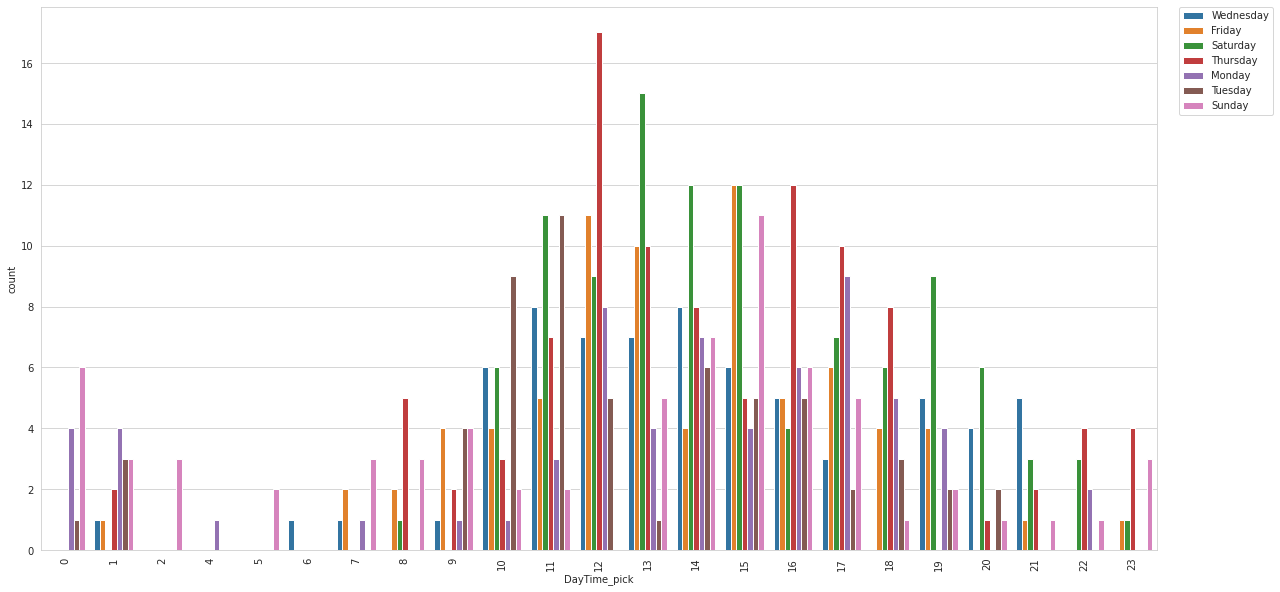

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='DayTime_pick', data = canc_trip_loc, hue = "DayOfWeek_pick")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Show the plot 
plt.show()

No handles with labels found to put in legend.


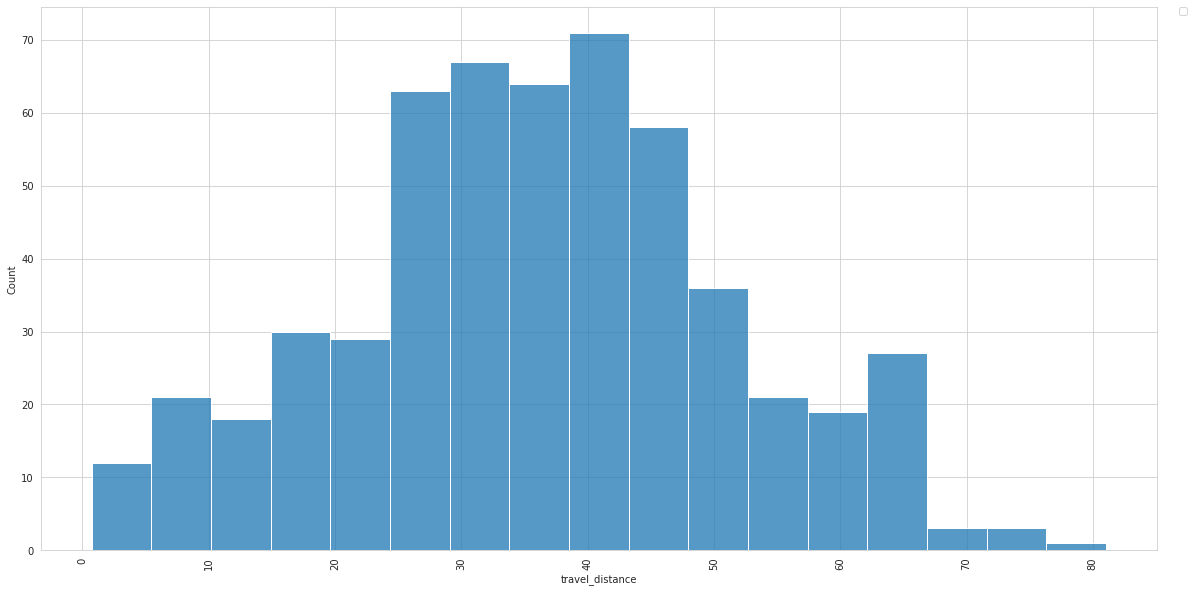

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.histplot(x ='travel_distance', data = canc_trip_loc)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Show the plot 
plt.show()

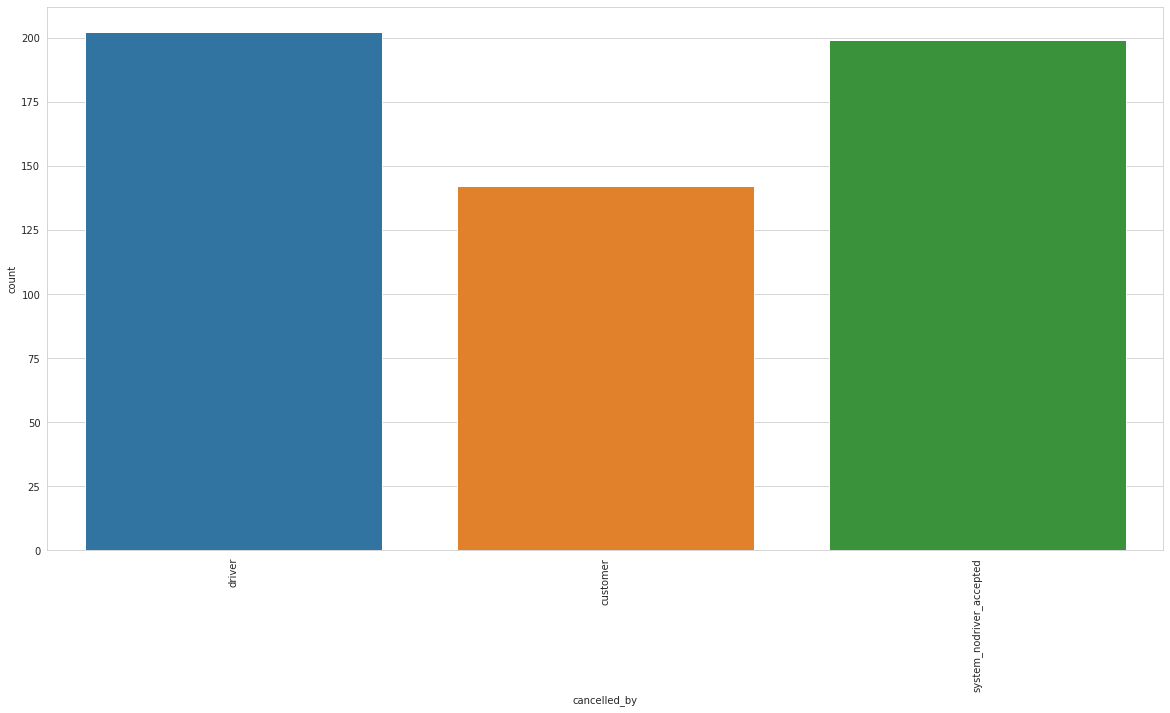

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='cancelled_by', data = canc_trip_loc)
plt.xticks(rotation = 90)
# Show the plot 
plt.show()

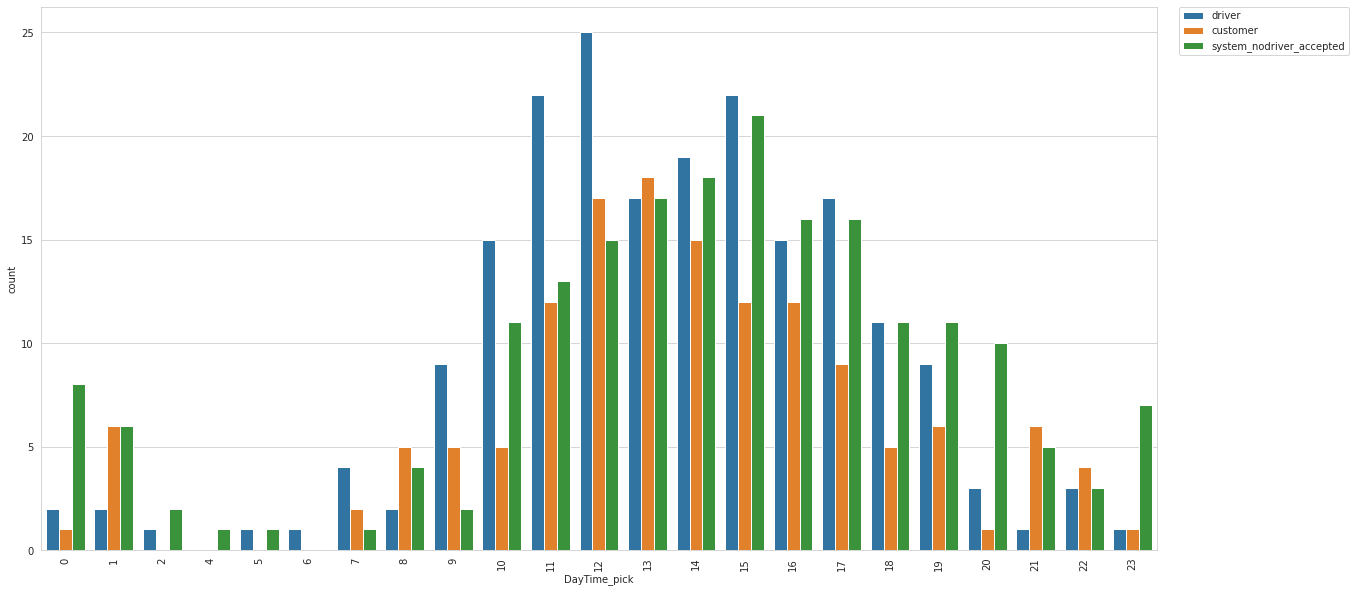

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='DayTime_pick', data = canc_trip_loc, hue = "cancelled_by")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Show the plot 
plt.show()

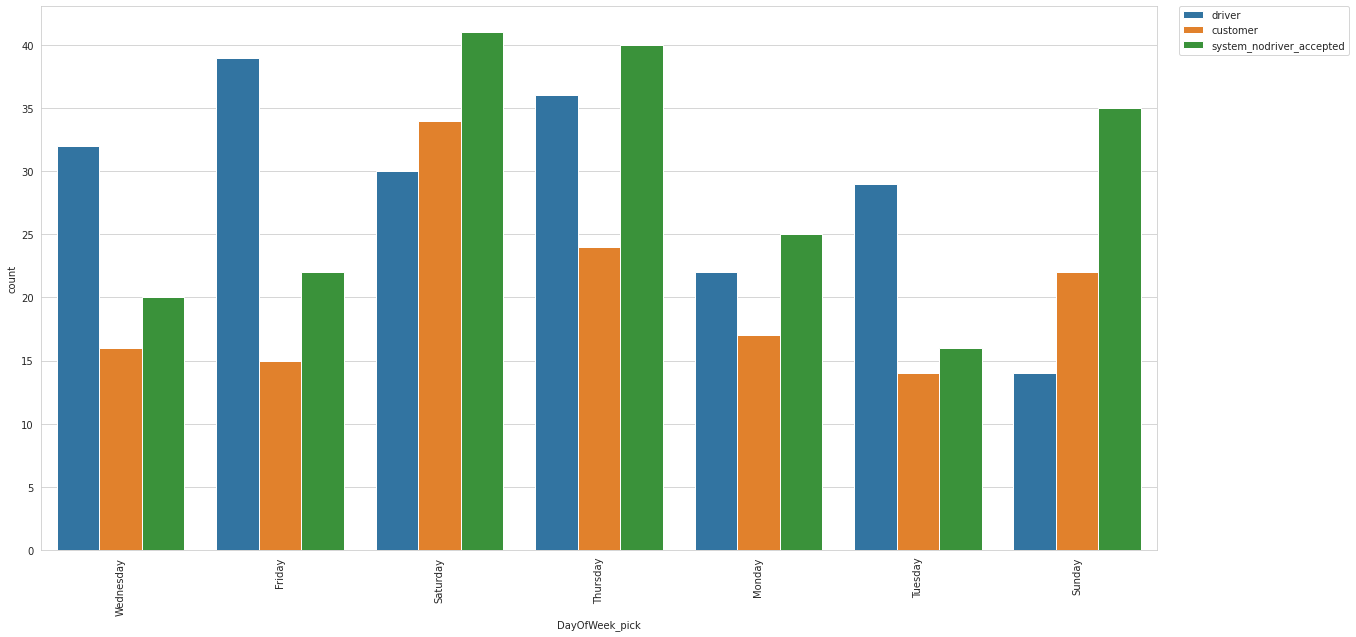

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='DayOfWeek_pick', data = canc_trip_loc, hue = "cancelled_by")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Show the plot 
plt.show()

## **2. Hypothesis analysis**

Oolala Cab services, have the assumption that customers are not able to find cabs to go to the Airport as drivers are canceling airport trips.

Here,

Null Hypothesis is maximum trips cancelled having Airport locations are by driver.

Alternate Hypothesis is maximum trips cancelled having Airport locations are not by driver.

From Last 3 Figures and data we can **Reject the Null Hypothesis** that drivers are the only reason behind cancellation of airport trips.


## **3. Reasons for Rejecting Null Hypothesis**


The Top most reason of rejecting the hypothesis is that not only drivers are reponsible for denial of airport trip. 

Drivers have rejected equivalent as many trips as the trips cancelled due to system failure.

Yes, it is indeed true that customers are not able to find cabs to go to the Airport as most of the trips are either denied by drivers or cancelled due to system was not able to find drivers at the moment.